<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py25_movielense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 파일 저장 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

* movies.dat 파일을 읽고, DataFrame 생성.
* DataFrame 탐색.
* 장르가 'Animation'인 영화는 몇 개?
* 장르가 로맨틱 코미디인 영화는 몇 개?
* 어떤 장르의 영화가 가장 많은가?

In [14]:
movies_colnames= ['movie_id', 'title', 'genres']

In [15]:
movies = pd.read_csv(movies_file, sep='::', engine='python', names=movies_colnames)

In [16]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
# Animation 장르의 영화
animations = movies[movies['genres'].str.contains('Animation')]
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [22]:
len(animations)

105

In [27]:
# 로맨틱 코미디 장르 - 장르 컬럼에 'Romance'와 'Comedy'가 포함되어 있는 영화들.
romantic_comedies = movies[(movies['genres'].str.contains('Romance')) &
                           (movies['genres'].str.contains('Comedy'))]
romantic_comedies                          

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [28]:
len(romantic_comedies)

204

In [29]:
# 가장 많이 나오는 장르.
movies['genres'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genres, Length: 301, dtype: int64

In [35]:
genres = [] # 개별 영화 장르를 저장할 빈 리스트
for s in movies['genres']:
    genres.extend(s.split(sep='|')) # append가 아닌 extend를 사용해서 1차원 리스트로 만듦
len(genres)

6408

In [37]:
genres_counts = pd.value_counts(genres)
genres_counts # Series

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [40]:
# 장르 상위 7개 시각화
top7 = genres_counts.head(n=7)
top7

Drama        1603
Comedy       1200
Action        503
Thriller      492
Romance       471
Horror        343
Adventure     283
dtype: int64

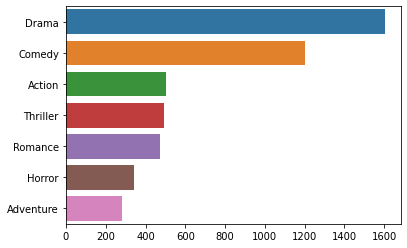

In [41]:
sns.barplot(x=top7.values, y=top7.index)
plt.show()

In [42]:
bottom7 = genres_counts.tail(n=7)
bottom7

Documentary    127
Musical        114
Mystery        106
Animation      105
Fantasy         68
Western         68
Film-Noir       44
dtype: int64

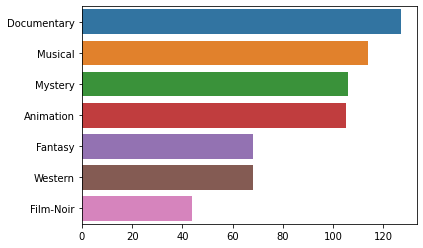

In [43]:
sns.barplot(x=bottom7.values, y=bottom7.index)
plt.show()

In [48]:
genre_counts_df = genres_counts.reset_index()
genre_counts_df.columns = ['genre', 'counts']
genre_counts_df

,genre,counts
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children's,251
9,Crime,211


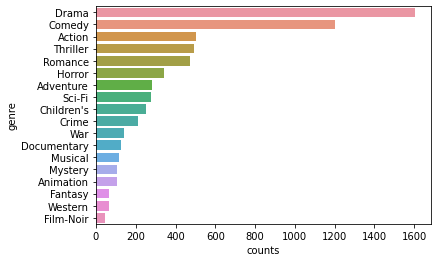

In [49]:
sns.barplot(x='counts', y='genre', data=genre_counts_df)
plt.show()

In [ ]:
# 과제 연도별 영화 개봉 숫자 시각화